In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat_fromstr
from uncertainties import unumpy as unp
from uncertainties.umath import *
import os
import pandas as pd
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/Compton Scattering/images')

In [2]:
def func(x, m, c):
    return m*x +c

[0.00029847 0.0003688  0.00043633 0.00050054 0.00056094 0.00061707
 0.0006685  0.00071485 0.00075575 0.0007909  0.00082004 0.00084293
 0.00085941 0.00086934 0.00087266]


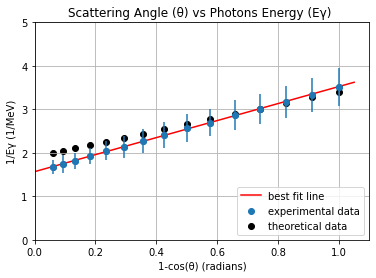

The slope is 1.9576048525025895 +/- 0.25039000227676833 and the intercept is 1.5669280327518722 +/- 0.09939561098691958


In [3]:
# unc on a is taken o be half the smallest incriment
#converted to MeV
a = unp.uarray(np.radians(np.array([20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])),np.radians(0.05))
e = unp.uarray(np.array([597,573,549,518,487,470,439,416,390,371,348,332,316,300,284]),
               np.array([56,65,55,50,54,55,54,52,49,44,41,38,37,35,35]))*(10**(-3))

x = []
for i in a:
    x.append(1-cos(i))

xvals = unp.uarray(unp.nominal_values(x),unp.std_devs(x))
x = unp.nominal_values(xvals)
xer = unp.std_devs(xvals)

yvals = 1/(e)
y = unp.nominal_values(yvals)
yer = unp.std_devs(yvals)

print(xer)

#plt real
plt.scatter(x,y, label = 'experimental data')

plt.title('Scattering Angle (θ) vs Photons Energy (Eγ) ')
plt.ylabel('1/Eγ (1/MeV)')
plt.xlabel('1-cos(θ) (radians)')

popt, pcov = curve_fit(func, x, y, p0 = [1.51,1.956], sigma = yer , absolute_sigma=True)

m = popt[0]
c = popt[1]
xr = np.linspace(0,1.05,15)
yfit=func(xr,*popt)


#plot theory
plt.plot(xr,yfit, 'r', label = 'best fit line')
plt.errorbar(x,y,yer,xer,fmt='o')

plt.scatter(x,func(x,1.51,1.9), color = 'k',label = 'theoretical data')


plt.xlim(0,1.1)
plt.ylim(0,5)

plt.grid(True)

plt.legend(loc='lower right')
plt.savefig('anglevenergy.png')
plt.show()

#uncertianties using the covariance matrix

e_m = np.sqrt(pcov[0,0])
e_c = np.sqrt(pcov[1,1])

print('The slope is',m,'+/-',e_m,'and the intercept is',c,'+/-',e_c)

In [4]:
def KleinNishina(ang):
    r = 2.82e-13
    a = 1 + np.cos(ang)**2
    b = (1 + 1.29*(1-np.cos(ang)))**2
    c = ((1.29)**2)*(1-np.cos(ang))**2
    d = a*(1 + 1.29*(1-np.cos(ang)))

    return ((r**2)/2)*(a/b)*(1+c/d)

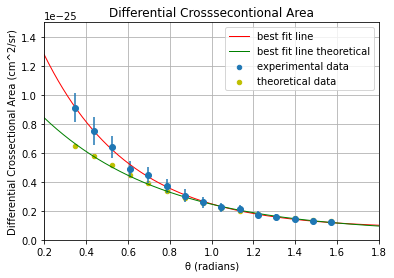

364719.39094474335


In [5]:
ipe = 0.1522*(e)**(-1.1325)
area = unp.uarray(np.array([12616,15240,17925,10484,15680,13043,14791,24188,14105,14757,10067,19027,11828,10227,73551]),
                  np.array([343,430,456,368,467,437,499,598,474,460,393,470,383,347,1082]))
t = unp.uarray(np.array([158.56,221.78,290.38,208.42,318.50,307.54,390.84,706.66,446.52,466.00,359.30,713.38,467.74,
                         420.62,3029.70]),0.005)

g = area/(ipe*t)
N = (79.3*55*6.0221409e+23)/(139)
sol = (np.pi*1)/(26**2)

def exp(x,a,b,c):
    return a*np.exp(-b*x)+c

# since the source was from aug 1977 presume in jan 2021 its 44.4167 years old
I = (1.013e+6)*np.exp(-(44.4167)/43.48)   


dcsdat = (g)/(N*sol*I)
dcs = unp.nominal_values(dcsdat)*10
dcser = unp.std_devs(dcsdat)*10


plt.scatter(unp.nominal_values(a),dcs,s =20,label = 'experimental data')

#theoretical 
plt.scatter(unp.nominal_values(a),KleinNishina(unp.nominal_values(a)),s=20,color = 'y', label = 'theoretical data')

popt1, pcov1 = curve_fit(exp,unp.nominal_values(a), dcs,p0= [0.65e-25,2.5,0] , absolute_sigma=True )
poptt, pcovt = curve_fit(exp,unp.nominal_values(a), KleinNishina(unp.nominal_values(a))
                         ,p0= [0.65e-25,2.5,0] , absolute_sigma=True )

xr1 = np.linspace(0.2,1.8,1000)
yfit1 = exp(xr1,*popt1)
yfitt =  exp(xr1,*poptt)
plt.plot(xr1,yfit1,linewidth = 1,color = 'r', label = 'best fit line')
plt.plot(xr1,yfitt,linewidth = 1,color = 'g', label = 'best fit line theoretical')

plt.errorbar(unp.nominal_values(a),dcs,dcser,unp.std_devs(a),fmt='o')
plt.title('Differential Crosssecontional Area')
plt.ylabel('Differential Crossectional Area (cm^2/sr)')
plt.xlabel('θ (radians)')
plt.xlim(0.2,1.8)
plt.ylim(0,1.5e-25)


plt.grid(True)
plt.legend(loc='upper right')
plt.savefig('dcs.png')
plt.show()


def KleinNishina2(ang):
    r = 2.82e-13
    val = []
    for i in ang:
        a = 1 + cos(i)**2
        b = (1 + 1.29*(1-cos(i)))**2
        c = ((1.29)**2)*(1-cos(i))**2
        d = a*(1 + 1.29*(1-cos(i)))
        ans = ((r**2)/2)*(a/b)*(1+c/d)
        val.append(ans)
    return val

print(I)

In [6]:


ipedat = []
gdat = []
for i in range(0,len(ipe)):
    z = ipe[i]
    x = g[i]
    ipedat.append(z)
    gdat.append(x)
    
Output = [ipedat,gdat]
# print(Output)
dataset = pd.DataFrame({'Intrinsic peak efficiency of NaI detector': Output[0], 'Sum gamma ': Output[1]})
print(dataset)
# dataset.sort(['Magnitude', 'Universal Time'], ascending=[0, 1])
print(dataset)


dataset.to_csv('comptondat2.1.csv')


   Intrinsic peak efficiency of NaI detector Sum gamma 
0                              0.273+/-0.029   291+/-32
1                                0.29+/-0.04   240+/-32
2                              0.300+/-0.034   206+/-24
3                              0.321+/-0.035   157+/-18
4                                0.34+/-0.04   143+/-18
5                                0.36+/-0.05   118+/-16
6                                0.39+/-0.05    98+/-14
7                                0.41+/-0.06    83+/-12
8                                0.44+/-0.06    71+/-10
9                                0.47+/-0.06     68+/-9
10                               0.50+/-0.07     56+/-8
11                               0.53+/-0.07     50+/-7
12                               0.56+/-0.07     45+/-6
13                               0.60+/-0.08     41+/-6
14                               0.63+/-0.09     38+/-5
   Intrinsic peak efficiency of NaI detector Sum gamma 
0                              0.273+/-0.029   2

In [7]:
name = [ 'Cs−137' , 'Ba−133' , 'Bi−207','Bi−207','Co−57' , 'Mn−54','Co−56','Na−22','Na−22','In−116','In−116',
        'In−116','Co−60','Co−60','K−40','Tl']
peak0 = unp.uarray(np.array([510,1275,1457,833,1236,123,1173,1332,417,1098,1293,355,662,570,1063,2613]),
                  np.array([2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3]))


compton0 = unp.uarray(np.array([338,1062,1240,637,1025,39,963,1118,263,890,1076,204,474,390,857,2379]),
                     np.array([6,10,7,4,5,3,5,4,6,10,5,4,10,2,8,4]))




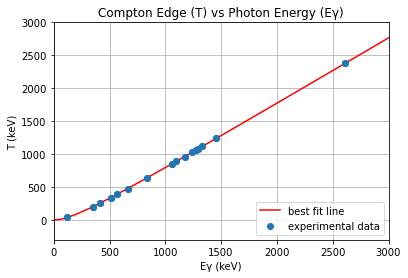

515+/-7


In [8]:
realelectronmass = 511 #MeV
peaker = unp.std_devs(peak0)
peak = unp.nominal_values(peak0)
comptoner = unp.std_devs(compton0)
compton = unp.nominal_values(compton0)


plt.scatter(peak,compton, label = 'experimental data')
plt.title('Compton Edge (T) vs Photon Energy (Eγ)')
plt.xlabel('Eγ (keV)')
plt.ylabel('T (keV)')

xr2 = np.linspace(0,3000,100)
yfit2=(2*xr2**2)/(2*xr2 +realelectronmass)

plt.plot(xr2,yfit2, 'r', label = 'best fit line')
plt.errorbar(peak,compton,peaker,comptoner,fmt='o')

plt.xlim(0,3000)
plt.ylim(-300,3000)

plt.grid(True)

plt.legend(loc='lower right')
plt.savefig('TvE.png')
plt.show()


print(np.mean((2*peak0**2-2*peak*compton0)/compton0))

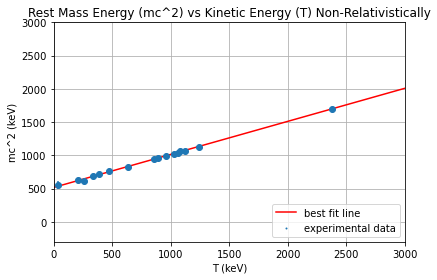

The slope is 0.49700365376651134 +/- 0.00640673168565986 and the intercept is 517.8989583553355 +/- 7.82544674890833


In [9]:
light = 3e+8

def restmass(E,T):
    return ((2*E-T)**2)/(2*T)

dat = restmass(peak0,compton0)
restmass = unp.nominal_values(dat)
restmasser = unp.std_devs(dat)

plt.scatter(compton, restmass, s =1,label = 'experimental data')
plt.title('Rest Mass Energy (mc^2) vs Kinetic Energy (T) Non-Relativistically')
plt.xlabel('T (keV)')
plt.ylabel('mc^2 (keV)')


popt3, pcov3 = curve_fit(func, compton, restmass, p0 = [0.5,500], sigma = restmasser, absolute_sigma = True)

m3 = popt3[0]
c3 = popt3[1]
xr3 = np.linspace(0,3000,1000)
yfit3=func(xr3,popt3[0], popt3[1])

plt.plot(xr3,yfit3, 'r', label = 'best fit line')
plt.errorbar(compton,restmass, restmasser, comptoner,fmt='o')


plt.xlim(0,3000)
plt.ylim(-300,3000)

plt.grid(True)

plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('restmassnonrel.png')
plt.show()

e_m3= np.sqrt(pcov3[0,0])
e_c3 = np.sqrt(pcov3[1,1])

print('The slope is',m3,'+/-',e_m3,'and the intercept is',c3,'+/-',e_c3)


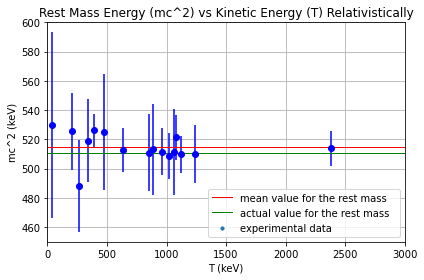

The slope is -0.003309179141712758 +/- 0.007212479830934564 and the intercept is 518.4703906729695 +/- 8.71023081500587
515+/-7


In [10]:

def relmass(E,T):
    return(2*E*(E-T))/T

    
dat1 = relmass(peak0,compton0)
relmass = unp.nominal_values(dat1)
relmasser = unp.std_devs(dat1)


plt.scatter(compton, relmass, s =10,label = 'experimental data')
plt.title('Rest Mass Energy (mc^2) vs Kinetic Energy (T) Relativistically')
plt.xlabel('T (keV)')
plt.ylabel('mc^2 (keV)')

popt4, pcov4 = curve_fit(func, compton, relmass,sigma = relmasser,absolute_sigma = True)

m4 = popt4[0]
c4 = popt4[1]
xr4 = np.linspace(0,3000,1000)
yfit4=func(xr4,popt4[0], popt4[1])

avy = np.full(len(xr4),np.average(relmass))
plt.plot(xr4,avy, 'r', linewidth = 1,label = 'mean value for the rest mass  ')
plt.plot(xr4,np.full(len(xr4),511), 'g', linewidth = 1,label = 'actual value for the rest mass  ')
plt.errorbar(compton,relmass, relmasser, comptoner,color = 'b',fmt='o')


plt.xlim(0,3000)
plt.ylim(450,600)

plt.grid(True)

plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('restmasrel.png')
plt.show()

e_m4 = np.sqrt(pcov4[0,0])
e_c4 = np.sqrt(pcov4[1,1])

print('The slope is',m4,'+/-',e_m4,'and the intercept is',c4,'+/-',e_c4)

print(np.mean(dat1))



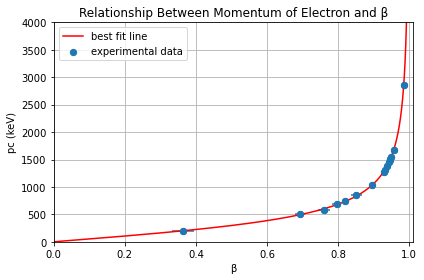

In [11]:
def B(E,T):
    return (T*(2*E-T))/(T**2 -2*E*T +2*E**2)

def pc(T,mass):

    return (2*T*mass +T**2)**0.5

def gamma(B):
    return 1 /(1- B**2)**0.5

def newline(x,mass):
    return gamma(x)*x*unp.nominal_values(mass)

mass = unp.uarray(c4,e_c4)


datmom = pc(compton0,mass)
mom = unp.nominal_values(datmom)


momer = unp.std_devs(datmom)

datB = B(peak0,compton0)
B = unp.nominal_values(datB)
Ber = unp.std_devs(datB)


plt.scatter(B, mom, s =40,label = 'experimental data')
plt.title('Relationship Between Momentum of Electron and β')
plt.xlabel('β')
plt.ylabel('pc (keV)')

popt5, pcov5 = curve_fit(newline, B, mom, p0= unp.nominal_values(mass) , sigma = momer, absolute_sigma=False)

xr5 = np.linspace(0,0.999,1000)


yfit5= newline(xr5,*popt5)

plt.plot(xr5,yfit5, 'r', label = 'best fit line')
plt.errorbar(B,mom, momer,Ber,fmt='o')
plt.grid(True)
plt.xlim(0,1.01)
plt.ylim(0,4000)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('momvbeta.png')
plt.show()


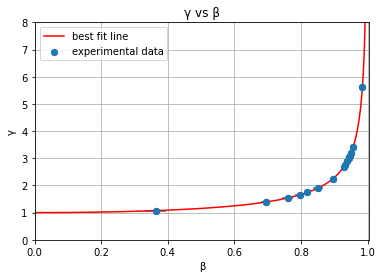

a =  1.0 +/- 0.01332510855225398 b = -1.0 +/- 0.014223258112060804


In [12]:
def gamma(B):
    return 1 /(1- B**2)**0.5

def linefit(B,a,b):
    return 1/(a+b*B**2)**0.5
datgamma = gamma(datB)
gamma = unp.nominal_values(datgamma)
gammaer = unp.std_devs(datgamma)



plt.scatter(B, gamma, s =40,label = 'experimental data')
plt.title('γ vs β')

plt.xlabel('β')
plt.ylabel('γ')

popt6, pcov6 = curve_fit(linefit, B, gamma, p0 = [0.98,-0.98] , sigma = gammaer, absolute_sigma=True)

xr6 = np.linspace(0,0.999,1000)
yfit6 = linefit(xr6,*popt6)
plt.xlim(0,1.005)
plt.ylim(0,8)
plt.plot(xr6,yfit6, 'r', label = 'best fit line')
plt.errorbar(B,gamma, gammaer,Ber,fmt='o')
plt.grid(True)

plt.legend(loc='upper left')
plt.savefig('gammavbeta.png')
plt.show()

e_a= np.sqrt(pcov6[0,0])
e_b = np.sqrt(pcov6[1,1])
print('a = ', popt6[0], '+/-', e_a, 'b =',popt6[1],'+/-',e_b)

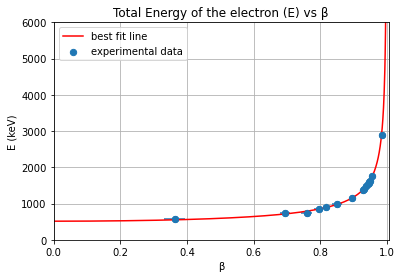

a =  513.4742386984315 +/- 1.0394497852062021


In [13]:
def linefit2(B,mass):
    return mass/np.sqrt(1-B**2)

def E(E,T):
    return (T**2 -2*E*T +2*E**2)/T
    
datE = E(peak0,compton0)
E = unp.nominal_values(datE)


Eer = unp.std_devs(datE)


plt.scatter(B, E, s =40,label = 'experimental data')
plt.title('Total Energy of the electron (E) vs β')

plt.xlabel('β')
plt.ylabel('E (keV)')

popt7, pcov7 = curve_fit(linefit2, B,E, p0 =  517 , sigma = Eer, absolute_sigma=True)

xr6 = np.linspace(0,0.999,1000)
yfit7 = linefit2(xr6,*popt7)
plt.xlim(0,1.005)
plt.ylim(0,6000)

plt.plot(xr6,yfit7, 'r', label = 'best fit line')
plt.errorbar(B,E, Eer,Ber,fmt='o')
plt.grid(True)

plt.legend(loc='upper left')
plt.savefig('energyvbeta.png')
plt.show()

e_e= np.sqrt(pcov7[0,0])

print('a = ', popt7[0], '+/-', e_e)